<a href="https://colab.research.google.com/github/a3539a/Colab/blob/main/3_4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
"""
날짜 : 2021/07/12
이름 : 김승용
내용 : 텐서플로 MNIST 딥러닝 실습하기
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.__version__

'2.5.0'

In [3]:
# 학습데이터 로드
(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터확인
print(mnist_train_data.shape, mnist_train_label.shape, mnist_test_data.shape, mnist_test_label.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


[30460 20914 44528  8842 54689]


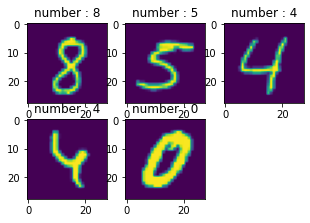

In [12]:
# 샘플 이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number : %d' % label)

In [13]:
# 학습을 위한 데이터 전처리(정규화)
mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

# 라벨 원-핫 엔코딩
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [52]:
# 학습모델 설계
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 학습모델 설정
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [54]:
# 학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2896 - acc: 0.9157
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1338 - acc: 0.9604
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0978 - acc: 0.9704
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0781 - acc: 0.9759
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - acc: 0.9796
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - acc: 0.9827
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - acc: 0.9847
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - acc: 0.9863
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0346 - acc: 0.9879
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0307 - acc: 0.9900


In [55]:
# 평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.1046 - acc: 0.9719


[0.10462058335542679, 0.9718999862670898]

In [56]:
# 테스트하기
result = model.predict(mnist_test_data)

score = accuracy_score(result.round(), mnist_test_label)
score

0.971

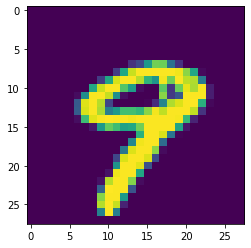

In [39]:
# 이미지 출력
plt.imshow(mnist_test_data[9].reshape(28, 28))

In [57]:
# 새로운 이미지 불러오기
img_num1 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num1.jpg')
img_num2 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num2.jpg')
img_num3 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num3.jpg')
img_num4 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num4.jpg')
img_num5 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num5.jpg')

In [60]:
# 이미지 파일의 픽셀 데이터로 변환
px_img_num1 = np.array(img_num1)
px_img_num2 = np.array(img_num2)
px_img_num3 = np.array(img_num3)
px_img_num4 = np.array(img_num4)
px_img_num5 = np.array(img_num5)

In [62]:
# 새로운 이미지 인식 여부 확인
img_arr = np.array([px_img_num1, px_img_num2, px_img_num3, px_img_num4, px_img_num5])
img_arr = img_arr / 255

result = model.predict(img_arr)
print(result.round())

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
